In [4]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [5]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U duckduckgo_search
    !pip install fastai
    !pip install fastbook
     

  Obtaining dependency information for duckduckgo_search from https://files.pythonhosted.org/packages/97/8e/01d4aea1f9fdac45973d2f1d07d29832a243f91106e10d8ffb442adf4f4d/duckduckgo_search-4.2-py3-none-any.whl.metadata
  Obtaining dependency information for curl-cffi>=0.5.10 from https://files.pythonhosted.org/packages/93/04/0d57a51690451437f72563031036ea4f4b529bc0cfd8e8d93487075cbe80/curl_cffi-0.5.10-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 68.9 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 22.9 MB/s eta 0:00:00


In [6]:
!pip install -U duckduckgo_search
!pip install fastai
!pip install fastbook

In [7]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

In [8]:
urls = search_images('rabbit photos', max_images=1)
urls[0]

Searching for 'rabbit photos'


'https://2.bp.blogspot.com/_FrqbU-g90Q0/TPYjVWAYL3I/AAAAAAAAAEw/VNgROFkoz5g/s1600/rabbits-1v.jpg'

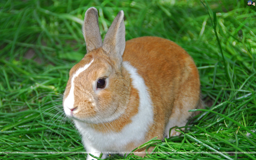

In [9]:
from fastdownload import download_url
dest = 'rabbit.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'sky photos'


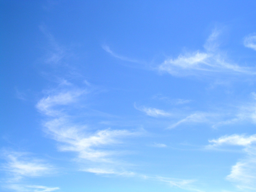

In [10]:
download_url(search_images('sky photos', max_images=1)[0], 'sky.jpg', show_progress=False)
Image.open('sky.jpg').to_thumb(256,256)

In [11]:
searches = 'rabbit','sky'
path = Path('rabbit_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sea photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'rabbit photo'
Searching for 'rabbit sea photo'
Searching for 'rabbit shade photo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'sky photo'
Searching for 'sky sea photo'
Searching for 'sky shade photo'


In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

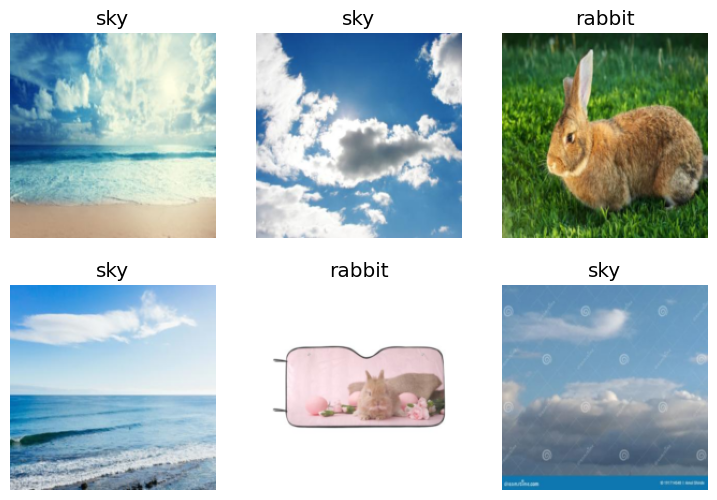

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 198MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.870602,0.516281,0.156250,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.133184,0.063629,0.031250,00:17
1,0.068792,0.015027,0.000000,00:17
2,0.045313,0.025519,0.000000,00:17


In [15]:
is_rabbit,_,probs = learn.predict(PILImage.create('rabbit.jpg'))
print(f"This is a: {is_rabbit}.")
print(f"Probability it's a rabbit: {probs[0]:.4f}")

This is a: rabbit.
Probability it's a rabbit: 1.0000


In [16]:
is_rabbit,_,probs = learn.predict(PILImage.create('sky.jpg'))
print(f"This is a: {is_rabbit}.")
print(f"Probability it's a rabbit: {probs[0]:.4f}")

This is a: sky.
Probability it's a rabbit: 0.0000
